<html> <h1 style="font-style:bold; color:blue;"> Machine Learning in Finance </h1> </html>

<html> <h1 style="font-style:italic; color:blue;"> Week-11 </h1> </html>

<html> <h2 style="font-style:italic; color:blue;"> Credit Scoring </h2> </html>


#### This is a training example of credit scoring using the Kaggle.com Dataset
(https://www.kaggle.com/datasets/urvishvekariya/credit-risk-assessment/data)

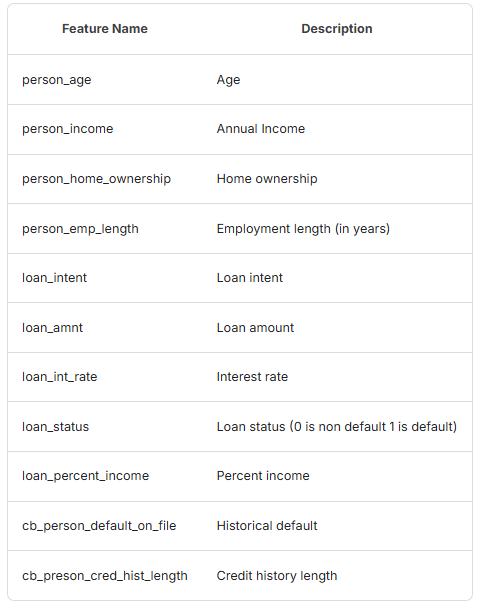

In [2]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



______________________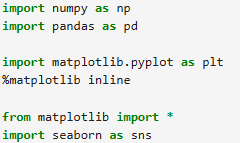

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import *
import seaborn as sns

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

___________________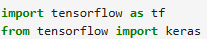

In [8]:
import tensorflow as tf
from tensorflow import keras

___________________

In [9]:
print(tf.__version__)

2.18.0


______________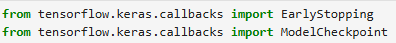

In [20]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

__________________

In [22]:
np.random.seed(42)

_____________________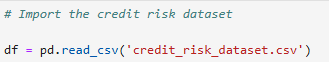

In [24]:
df = pd.read_csv('credit_risk_dataset.csv')

____________________

In [26]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


__________________________

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_amnt                   32581 non-null  int64  
 6   loan_int_rate               29465 non-null  float64
 7   loan_status                 32581 non-null  int64  
 8   loan_percent_income         32581 non-null  float64
 9   cb_person_default_on_file   32581 non-null  object 
 10  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 2.7+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_amnt                   32581 non-null  int64  
 6   loan_int_rate               29465 non-null  float64
 7   loan_status                 32581 non-null  int64  
 8   loan_percent_income         32581 non-null  float64
 9   cb_person_default_on_file   32581 non-null  object 
 10  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 2.7+ MB


<html> <h3 style="font-style:italic; color:blue;"> Data preprocessing </h3> </html>

___________________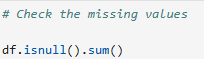

In [30]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [32]:
# Impute missing values with mean

imputer = SimpleImputer(strategy='mean')

df['person_emp_length'] = imputer.fit_transform(df[['person_emp_length']])
df['loan_int_rate'] = imputer.fit_transform(df[['loan_int_rate']])

____________________

In [34]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [20]:
# It doesn't have any NaN(s)

____________________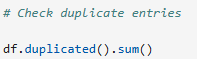

In [36]:
df.duplicated().sum()

165

165

_________________________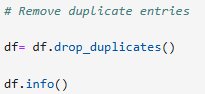

In [38]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32416 entries, 0 to 32580
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  object 
 3   person_emp_length           32416 non-null  float64
 4   loan_intent                 32416 non-null  object 
 5   loan_amnt                   32416 non-null  int64  
 6   loan_int_rate               32416 non-null  float64
 7   loan_status                 32416 non-null  int64  
 8   loan_percent_income         32416 non-null  float64
 9   cb_person_default_on_file   32416 non-null  object 
 10  cb_person_cred_hist_length  32416 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 3.0+ MB


<class 'pandas.core.frame.DataFrame'>
Index: 32416 entries, 0 to 32580
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  object 
 3   person_emp_length           32416 non-null  float64
 4   loan_intent                 32416 non-null  object 
 5   loan_amnt                   32416 non-null  int64  
 6   loan_int_rate               32416 non-null  float64
 7   loan_status                 32416 non-null  int64  
 8   loan_percent_income         32416 non-null  float64
 9   cb_person_default_on_file   32416 non-null  object 
 10  cb_person_cred_hist_length  32416 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 3.0+ MB


_______________________________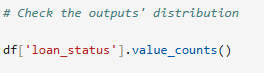

In [40]:
df['loan_status'].value_counts()

loan_status
0    25327
1     7089
Name: count, dtype: int64

loan_status
0    25327
1     7089
Name: count, dtype: int64

__________________________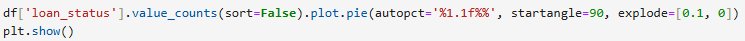

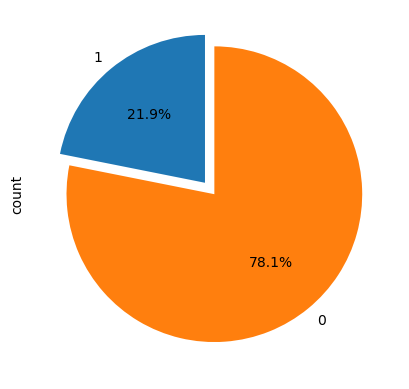

In [42]:
df['loan_status' ]. value_counts(sort=False).plot.pie(autopct='%1.1f%%', startangle=90, explode=[0.1, 0])
plt.show()

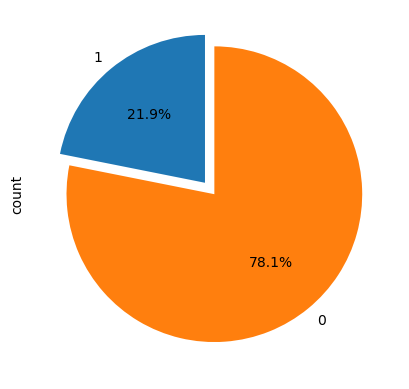

In [25]:
# The dataset is unbalanced

_____________________________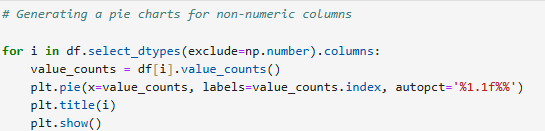

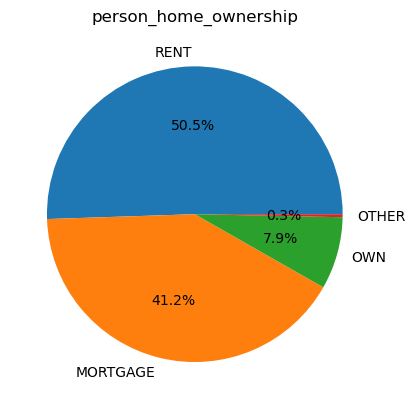

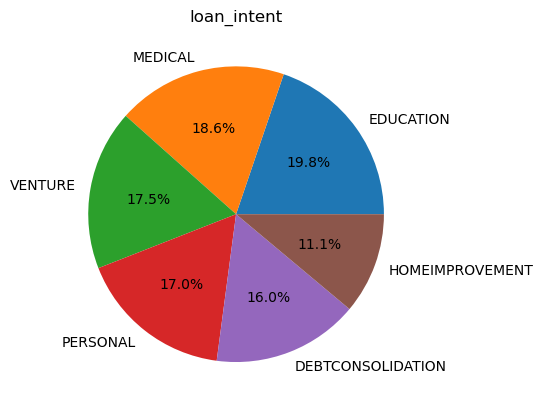

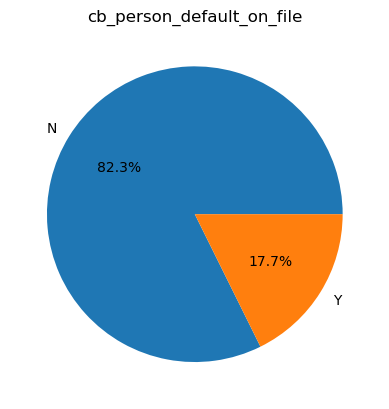

In [46]:
for i in df.select_dtypes(exclude=np.number).columns:
    value_counts = df[i].value_counts()
    plt.pie(x=value_counts, labels=value_counts.index, autopct='%1.1f%%')
    plt.title(i)
    plt.show()

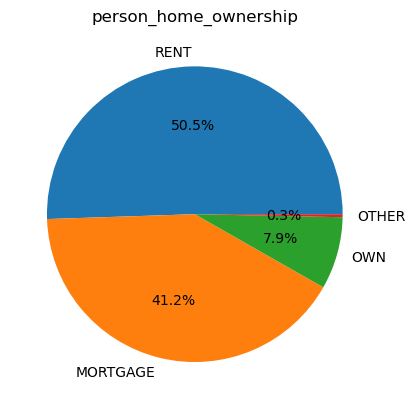

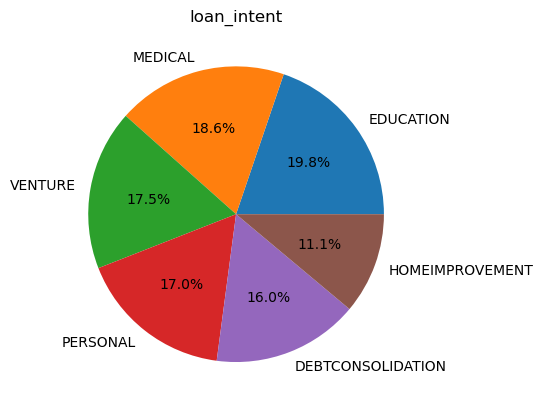

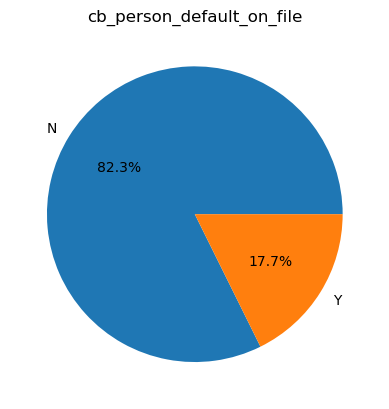

_____________________________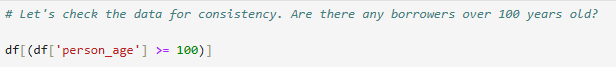

In [48]:
df[(df['person_age'] >= 100)]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,4800,13.570000,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,6000,11.860000,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,20400,10.250000,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,20000,11.011695,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,5000,12.730000,0,0.00,N,25


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,4800,13.570000,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,6000,11.860000,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,20400,10.250000,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,20000,11.011695,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,5000,12.730000,0,0.00,N,25


#### Now just press 'CTRL' and 'ENTER' keys on the 3 next cells.

In [50]:
# For this analysis, all data entries with age 100 and above can be disregarded. This is not of importance

df = df.drop(df[(df['person_age'] >= 100)].index)

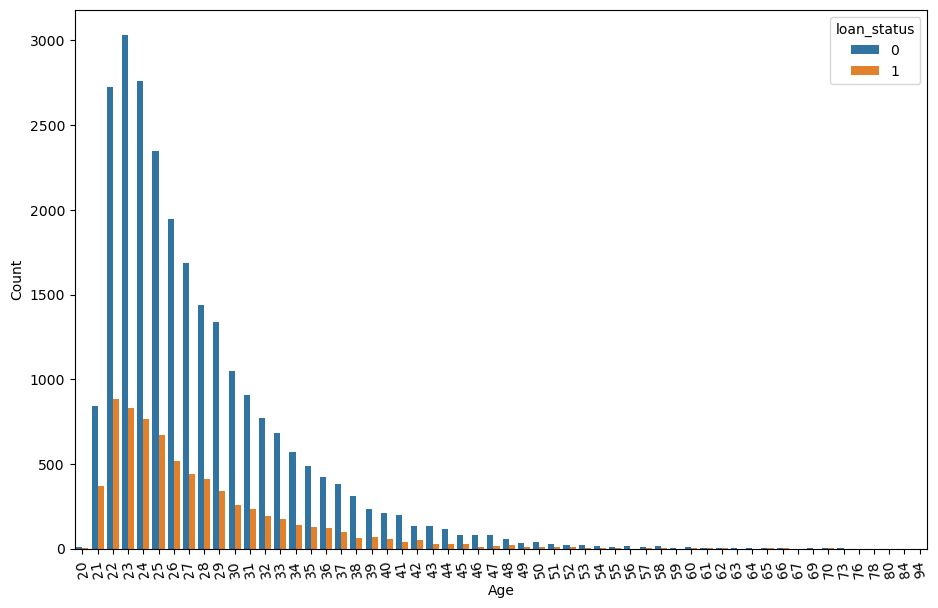

In [52]:
fig = plt.figure(figsize=(11, 7))
sns.countplot(data = df, x = 'person_age', hue = 'loan_status')

plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=100)
plt.show();

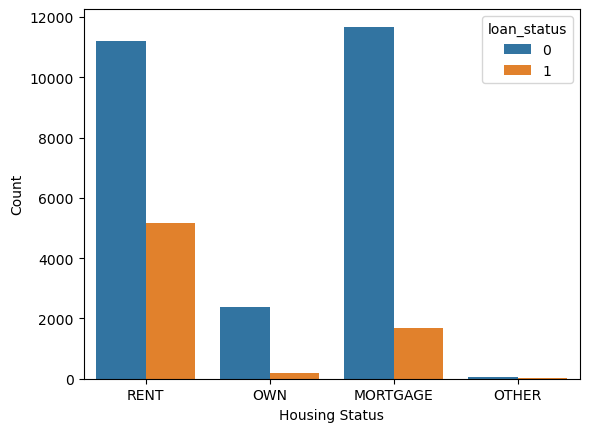

In [54]:
sns.countplot(data = df, x = 'person_home_ownership', hue = 'loan_status')

plt.xlabel('Housing Status')
plt.ylabel('Count')
plt.show();

In [31]:
# Renters often default on loans, homeowners rarely do

______________________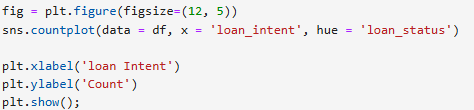

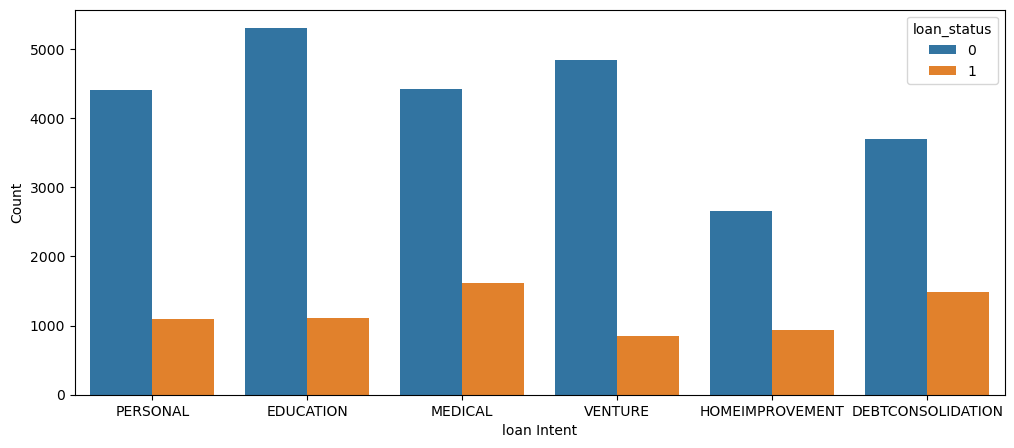

In [56]:
fig = plt.figure(figsize=(12,5))
sns.countplot(data = df, x = 'loan_intent', hue = 'loan_status')
plt.xlabel('loan Intent')
plt.ylabel('Count')
plt.show();

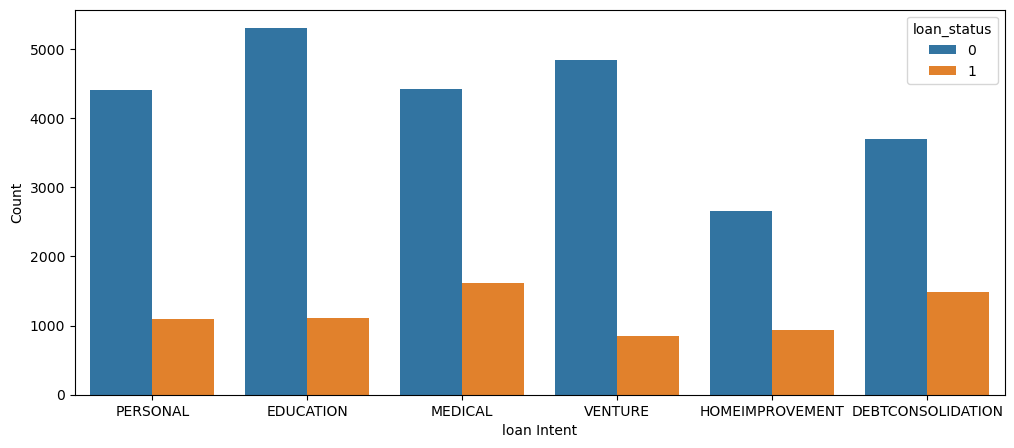

In [33]:
# Medical loans and Debt-Consolidation loans are more risky

________________________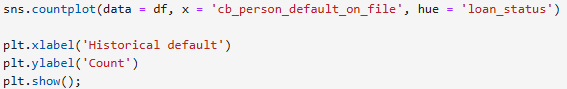

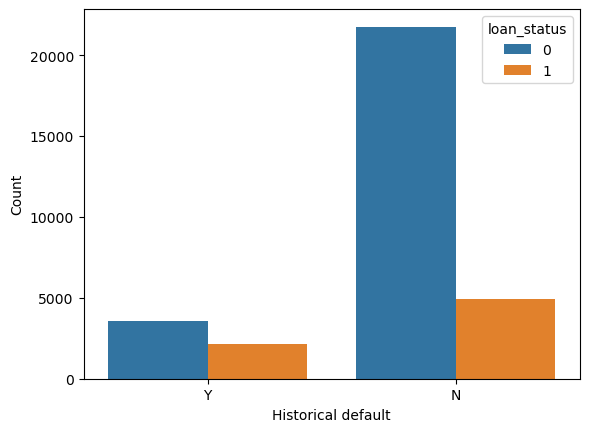

In [58]:
sns.countplot(data = df, x = 'cb_person_default_on_file', hue = 'loan_status')
plt.xlabel('Historical default')
plt.ylabel('Count')
plt.show();

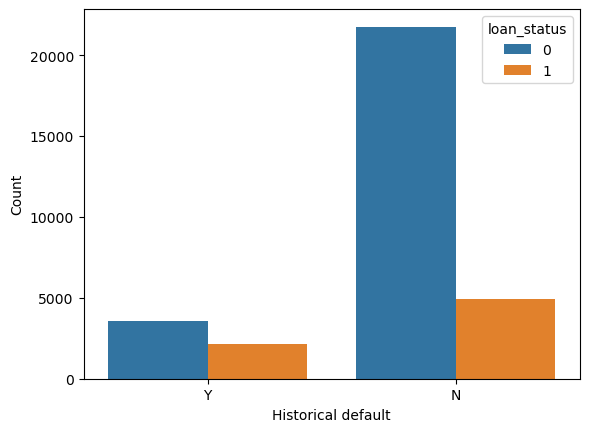

In [35]:
# Those who have defaulted on loans in the past are highly likely to default on a new loan

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [60]:
# transform categorical variables into integers

for colname in df.select_dtypes("object"):
    df[colname], _ = df[colname].factorize()

For Categorical variables with more than 2 variants, it is more correct to use the one-hot encoding method. 

 Detailed description is here:

https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.OneHotEncoder.html

______________________

In [62]:
df.head(3)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,0,123.0,0,35000,16.02,1,0.59,0,3
1,21,9600,1,5.0,1,1000,11.14,0,0.10,1,2
2,25,9600,2,1.0,2,5500,12.87,1,0.57,1,3


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,0,123.0,0,35000,16.02,1,0.59,0,3
1,21,9600,1,5.0,1,1000,11.14,0,0.10,1,2
2,25,9600,2,1.0,2,5500,12.87,1,0.57,1,3


_________________________

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32411 entries, 0 to 32580
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32411 non-null  int64  
 1   person_income               32411 non-null  int64  
 2   person_home_ownership       32411 non-null  int64  
 3   person_emp_length           32411 non-null  float64
 4   loan_intent                 32411 non-null  int64  
 5   loan_amnt                   32411 non-null  int64  
 6   loan_int_rate               32411 non-null  float64
 7   loan_status                 32411 non-null  int64  
 8   loan_percent_income         32411 non-null  float64
 9   cb_person_default_on_file   32411 non-null  int64  
 10  cb_person_cred_hist_length  32411 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 3.0 MB


<class 'pandas.core.frame.DataFrame'>
Index: 32411 entries, 0 to 32580
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32411 non-null  int64  
 1   person_income               32411 non-null  int64  
 2   person_home_ownership       32411 non-null  int64  
 3   person_emp_length           32411 non-null  float64
 4   loan_intent                 32411 non-null  int64  
 5   loan_amnt                   32411 non-null  int64  
 6   loan_int_rate               32411 non-null  float64
 7   loan_status                 32411 non-null  int64  
 8   loan_percent_income         32411 non-null  float64
 9   cb_person_default_on_file   32411 non-null  int64  
 10  cb_person_cred_hist_length  32411 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 3.0 MB


<html> <h3 style="font-style:italic; color:blue;"> Heat Map</h3> </html>

___________________________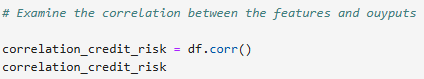

In [66]:
correlation_credit_risk = df.corr()
correlation_credit_risk

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
person_age,1.000000,0.140393,0.032486,0.164081,0.026672,0.051460,0.010513,-0.021808,-0.041546,-0.006537,0.878238
person_income,0.140393,1.000000,0.231399,0.150957,0.024362,0.316717,-0.001063,-0.169284,-0.294732,0.002562,0.122612
person_home_ownership,0.032486,0.231399,1.000000,0.228437,0.017222,0.129275,-0.131836,-0.218461,-0.135102,0.061586,0.025462
person_emp_length,0.164081,0.150957,0.228437,1.000000,0.016314,0.111931,-0.053068,-0.081290,-0.052950,0.027730,0.142884
loan_intent,0.026672,0.024362,0.017222,0.016314,1.000000,0.018932,0.006208,0.065827,-0.002263,-0.010578,0.016466
loan_amnt,0.051460,0.316717,0.129275,0.111931,0.018932,1.000000,0.139670,0.105771,0.572779,-0.039365,0.042018
loan_int_rate,0.010513,-0.001063,-0.131836,-0.053068,0.006208,0.139670,1.000000,0.320099,0.114513,-0.477082,0.014970
loan_status,-0.021808,-0.169284,-0.218461,-0.081290,0.065827,0.105771,0.320099,1.000000,0.379704,-0.179354,-0.016473
loan_percent_income,-0.041546,-0.294732,-0.135102,-0.052950,-0.002263,0.572779,0.114513,0.379704,1.000000,-0.036170,-0.031281
cb_person_default_on_file,-0.006537,0.002562,0.061586,0.027730,-0.010578,-0.039365,-0.477082,-0.179354,-0.036170,1.000000,-0.004199


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
person_age,1.000000,0.140393,0.032486,0.164081,0.026672,0.051460,0.010513,-0.021808,-0.041546,-0.006537,0.878238
person_income,0.140393,1.000000,0.231399,0.150957,0.024362,0.316717,-0.001063,-0.169284,-0.294732,0.002562,0.122612
person_home_ownership,0.032486,0.231399,1.000000,0.228437,0.017222,0.129275,-0.131836,-0.218461,-0.135102,0.061586,0.025462
person_emp_length,0.164081,0.150957,0.228437,1.000000,0.016314,0.111931,-0.053068,-0.081290,-0.052950,0.027730,0.142884
loan_intent,0.026672,0.024362,0.017222,0.016314,1.000000,0.018932,0.006208,0.065827,-0.002263,-0.010578,0.016466
loan_amnt,0.051460,0.316717,0.129275,0.111931,0.018932,1.000000,0.139670,0.105771,0.572779,-0.039365,0.042018
loan_int_rate,0.010513,-0.001063,-0.131836,-0.053068,0.006208,0.139670,1.000000,0.320099,0.114513,-0.477082,0.014970
loan_status,-0.021808,-0.169284,-0.218461,-0.081290,0.065827,0.105771,0.320099,1.000000,0.379704,-0.179354,-0.016473
loan_percent_income,-0.041546,-0.294732,-0.135102,-0.052950,-0.002263,0.572779,0.114513,0.379704,1.000000,-0.036170,-0.031281
cb_person_default_on_file,-0.006537,0.002562,0.061586,0.027730,-0.010578,-0.039365,-0.477082,-0.179354,-0.036170,1.000000,-0.004199


#### Now just press 'CTRL' and 'ENTER' keys on the 3 next cells.

In [68]:
corr_order = df.corr()[['loan_status']].sort_values(by='loan_status', ascending=False)
corr_order

,loan_status
loan_status,1.000000
loan_percent_income,0.379704
loan_int_rate,0.320099
loan_amnt,0.105771
loan_intent,0.065827
cb_person_cred_hist_length,-0.016473
person_age,-0.021808
person_emp_length,-0.081290
person_income,-0.169284
cb_person_default_on_file,-0.179354


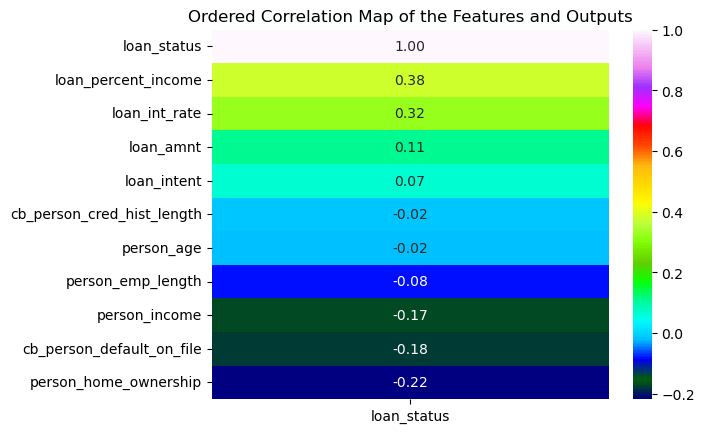

In [70]:
# Heat map for correlations with outputs

sns.heatmap(corr_order, annot=True, fmt='.2f', cmap='gist_ncar')
plt.title('Ordered Correlation Map of the Features and Outputs')
plt.show()

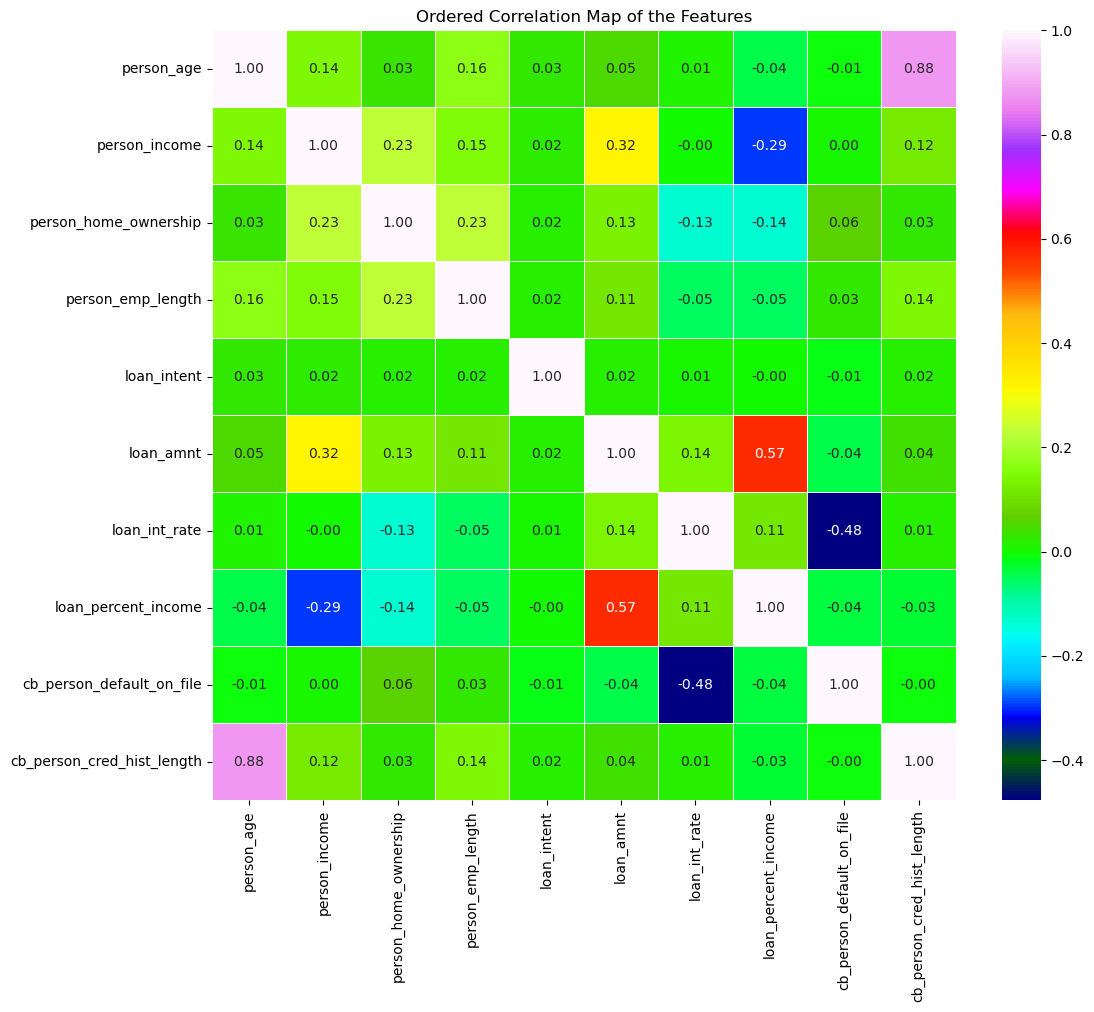

In [72]:
# Heat map for features without outputs

plt.figure(figsize=(12,10))
corr_order_without_target = df.drop('loan_status', axis=1).corr()
sns.heatmap(corr_order_without_target, annot=True, fmt='.2f', annot_kws={"size": 10}, cbar=True, linewidths=0.5, cmap='gist_ncar')
plt.title('Ordered Correlation Map of the Features')
plt.show()

______________________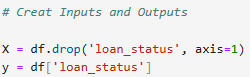

In [74]:
X = df.drop('loan_status', axis=1)
y = df ['loan_status' ]

___________________________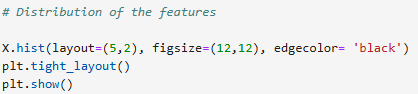

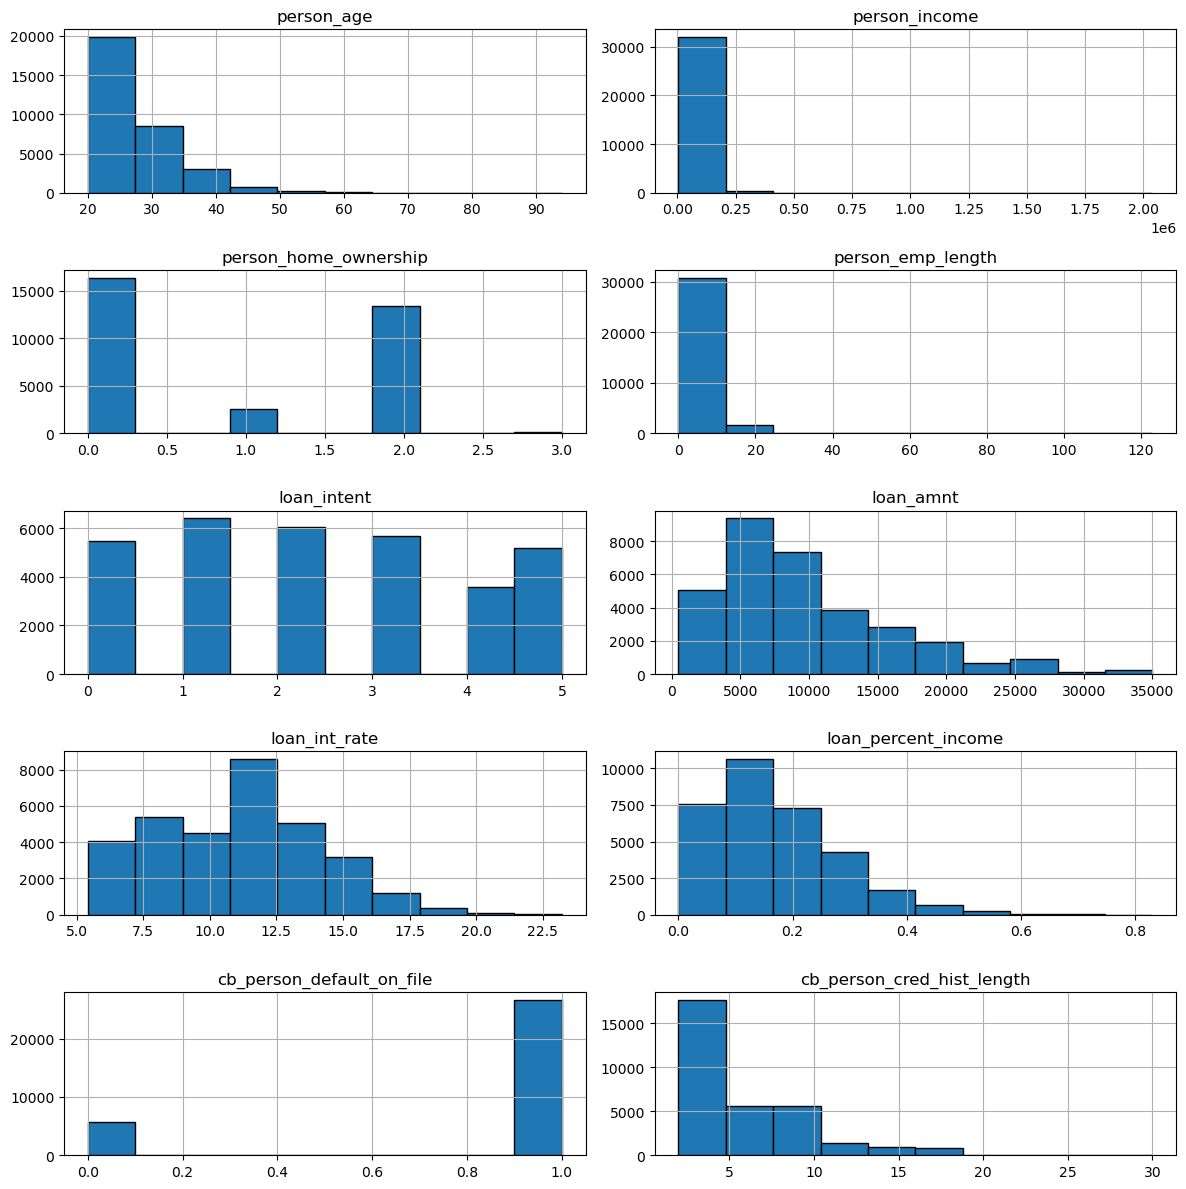

In [76]:
X.hist(layout=(5,2), figsize=(12,12), edgecolor= 'black')
plt.tight_layout()
plt.show()

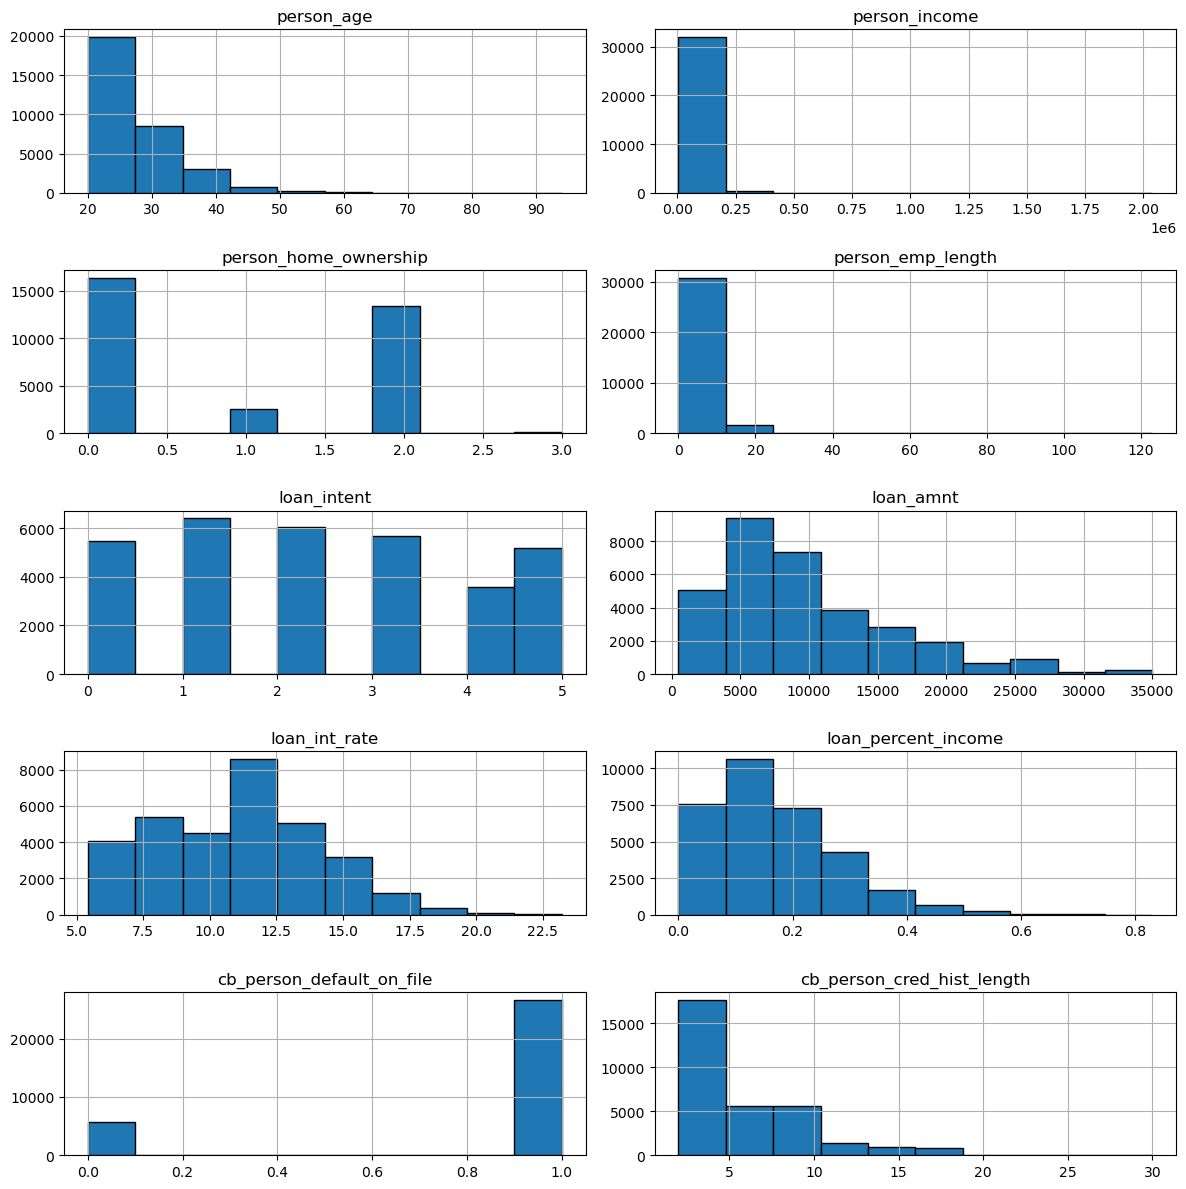

#### Now just press 'CTRL' and 'ENTER' keys on the 2 next cells.

In [78]:
# Splitting the datasets into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
# changing the distribution of values so that the mean of the observed values is -0- 
# and the standard deviation is 1.

scaler = StandardScaler()
X_train_imb = scaler.fit_transform(X_train)
X_test_imb =  scaler.transform (X_test)

___________________________

In [82]:
X_train_imb.shape

(25928, 10)

(25928, 10)

<html> <h3 style="font-style:italic; color:blue;"> Multi Layer Perceptron (MLP) </h3> </html>

____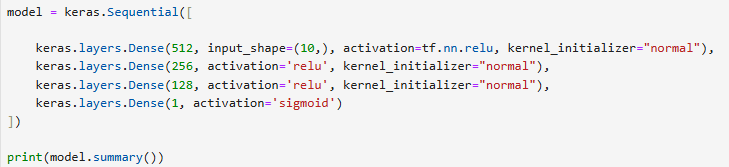

In [84]:
model = keras.Sequential([

keras. layers.Dense(512, input_shape=(10,), activation=tf.nn.relu, kernel_initializer="normal"),
keras.layers.Dense(256, activation='relu', kernel_initializer="normal"),
keras. layers.Dense(128, activation='relu', kernel_initializer="normal"),
keras. layers.Dense(1, activation='sigmoid' )

])

print(model.summary())

C:\Users\SMART TECH\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │         5,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 169,985 (664.00 KB)

 Trainable params: 169,985 (664.00 KB)

 Non-trainable params: 0 (0.00 B)

None


C:\Users\vital\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │         5,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 169,985 (664.00 KB)

 Trainable params: 169,985 (664.00 KB)

 Non-trainable params: 0 (0.00 B)

None


____________________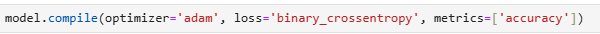

In [86]:
model. compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

__________________________

In [88]:
mc = ModelCheckpoint('best_model_MLP.keras', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

___________________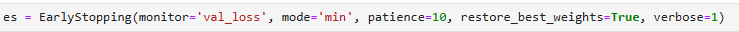

In [90]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True, verbose=1)

<html> <h4 style="font-style:bold; color:blue;"> If you are using your own laptop without a GPU (Graphics processing unit), 

please change the following parameter in the next cell 

epochs=10
</h4> </html>

__________________________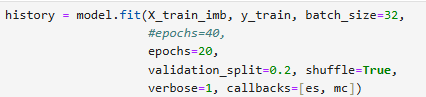

In [92]:
history = model. fit(X_train_imb, y_train, batch_size=32,
#epochs=40,
epochs=10,
validation_split=0.2, shuffle=True,
verbose=1, callbacks=[es, mc])

Epoch 1/10
647/649 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8357 - loss: 0.3968
Epoch 1: val_loss improved from inf to 0.32048, saving model to best_model_MLP.keras
649/649 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8358 - loss: 0.3966 - val_accuracy: 0.8683 - val_loss: 0.3205
Epoch 2/10
644/649 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8726 - loss: 0.3221
Epoch 2: val_loss did not improve from 0.32048
649/649 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8726 - loss: 0.3221 - val_accuracy: 0.8720 - val_loss: 0.3219
Epoch 3/10
637/649 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8765 - loss: 0.3191
Epoch 3: val_loss improved from 0.32048 to 0.30876, saving model to best_model_MLP.keras
649/649 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8766 - loss: 0.3189 - val_accuracy: 0.8787 - val_loss: 0.3088
Epoch 4/10
638/649 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8835 - loss: 0.2969
Epoch 4: val_loss improved from 0.30876 to 0.30808, saving model to best_model_MLP.k

Epoch 1/40
645/649 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8323 - loss: 0.3913
Epoch 1: val_loss improved from inf to 0.32382, saving model to best_model_MLP.keras
649/649 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.8325 - loss: 0.3910 - val_accuracy: 0.8696 - val_loss: 0.3238
Epoch 2/40
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8717 - loss: 0.3248
Epoch 2: val_loss improved from 0.32382 to 0.31118, saving model to best_model_MLP.keras
649/649 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8717 - loss: 0.3248 - val_accuracy: 0.8756 - val_loss: 0.3112
Epoch 3/40
642/649 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8796 - loss: 0.3106
Epoch 3: val_loss did not improve from 0.31118
649/649 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8796 - loss: 0.3106 - val_accuracy: 0.8750 - val_loss: 0.3134
Epoch 4/40
642/649 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8843 - loss: 0.3067
Epoch 4: val_loss improved from 0.31118 to 0.29802, saving model to best_model_MLP

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

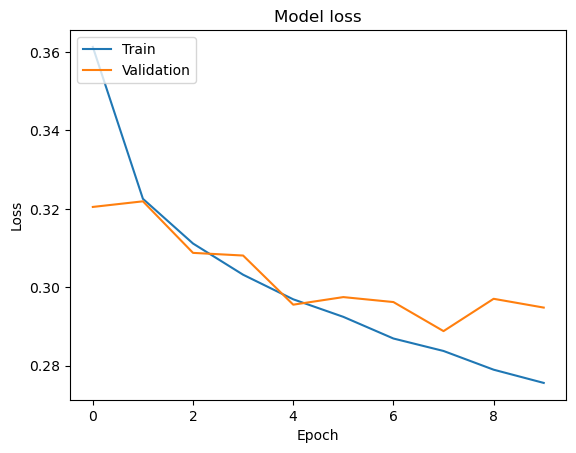

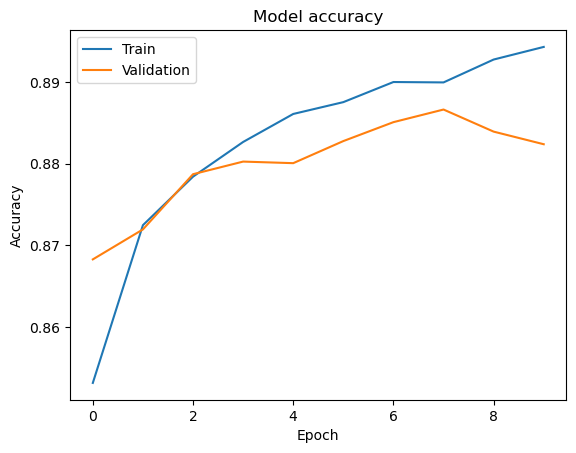

In [94]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

_______________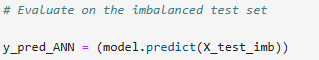

In [96]:
y_pred_ANN = (model.predict(X_test_imb))

203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


#### Now just press 'CTRL' and 'ENTER' keys on the 2 next cells.

In [98]:
print(y_pred_ANN[:10])
y_pred_ANN_labels = (y_pred_ANN >= 0.5).astype(int)

[[0.42027712]
 [0.01943344]
 [0.04970003]
 [0.09763038]
 [0.22737944]
 [1.        ]
 [0.03814592]
 [0.75985646]
 [0.10876051]
 [0.07872411]]


Imbalanced MLP Dataset Results
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      5080
           1       0.86      0.58      0.70      1403

    accuracy                           0.89      6483
   macro avg       0.88      0.78      0.81      6483
weighted avg       0.89      0.89      0.88      6483



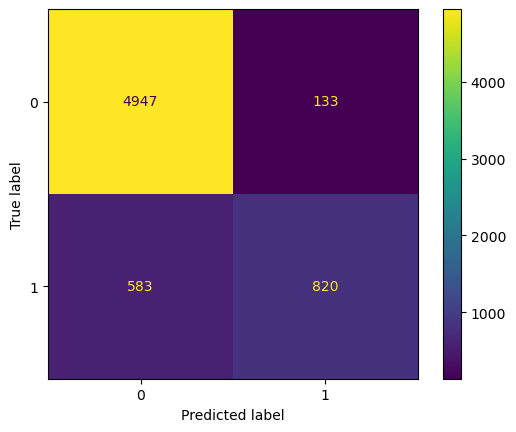

In [100]:
print("Imbalanced MLP Dataset Results")
print(classification_report(y_test, y_pred_ANN_labels))

# Confusion matrix for ANN
cm = confusion_matrix(y_test, y_pred_ANN_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show()

<html> <h3 style="font-style:italic; color:blue;"> Random Forest </h3> </html>

____________________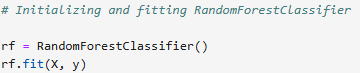

In [106]:
rf = RandomForestClassifier()
rf.fit(X, y)

RandomForestClassifier()

RandomForestClassifier()

_______________________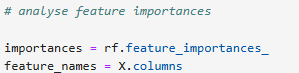

In [108]:
importances = rf.feature_importances_
feature_names = X. columns

#### Now just press 'CTRL' and 'ENTER' keys on the 4 next cells.

In [110]:
# Sort feature importances in descending order

indices = np.argsort(importances)[::-1]

In [112]:
# Print feature ranking

print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature loan_percent_income (0.233895)
2. feature loan_int_rate (0.188745)
3. feature person_income (0.161323)
4. feature person_home_ownership (0.098151)
5. feature loan_amnt (0.080468)
6. feature loan_intent (0.067854)
7. feature person_emp_length (0.062823)
8. feature person_age (0.050067)
9. feature cb_person_cred_hist_length (0.039942)
10. feature cb_person_default_on_file (0.016731)


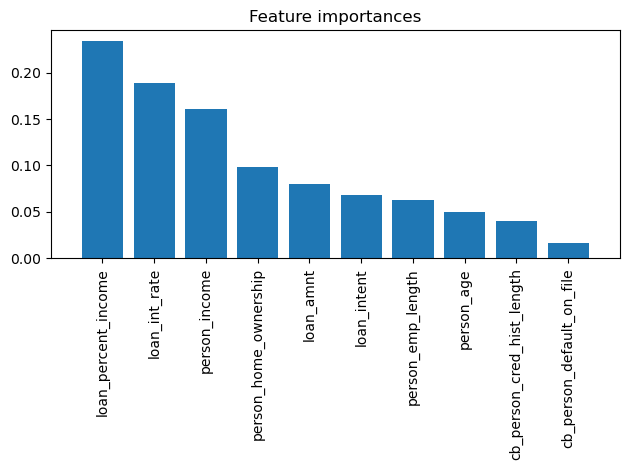

In [114]:
# Plot feature importances

plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

In [116]:
# Random Forest

new_random = RandomForestClassifier(n_estimators=200,
                                criterion='gini',
                                max_features='sqrt',
                                max_depth=10,
                                min_samples_split=5,
                                min_samples_leaf=2,
                                random_state=42)

new_random.fit(X_train_imb, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=42)

______________________

In [118]:
y_pred_random = new_random. predict(X_test_imb)

__________________________

In [120]:
print(classification_report(y_test, y_pred_random) )

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      5080
           1       0.94      0.65      0.77      1403

    accuracy                           0.91      6483
   macro avg       0.92      0.82      0.86      6483
weighted avg       0.92      0.91      0.91      6483



              precision    recall  f1-score   support

           0       0.91      0.99      0.95      5080
           1       0.94      0.65      0.77      1403

    accuracy                           0.91      6483
   macro avg       0.92      0.82      0.86      6483
weighted avg       0.92      0.91      0.91      6483



#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

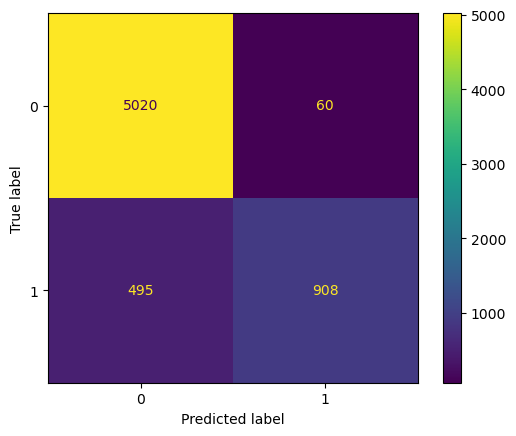

In [122]:
# Confusion matrix for Random Forest

cm_random = confusion_matrix(y_test, y_pred_random)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_random, display_labels=[0, 1])
disp_rf.plot()
plt.show();


<html> <h3 style="font-style:italic; color:blue;"> Logistic Regression </h3> </html>

#### Now just press 'CTRL' and 'ENTER' keys on the 4 next cells.

In [124]:
# Feature selection

# This is a meta-transformer that can be used with any model that assigns importance to each feature 
# through a specific importance_getter attribute called after training

feature_selector = SelectFromModel(LogisticRegression())
X_train_selected = feature_selector.fit_transform(X_train_imb, y_train)
X_test_selected = feature_selector.transform(X_test_imb)


In [126]:
# Defining the parameter grid for grid search

param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

In [128]:
# Perform grid search with cross-validation

grid_search = GridSearchCV(estimator=LogisticRegression(max_iter=1000), 
                           param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train_imb, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1.0, 10.0], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [132]:
# Print the best parameters and the best cross-validation score

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation score: {grid_search.best_score_:.2f}')

Best parameters: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
Best cross-validation score: 0.84


______________________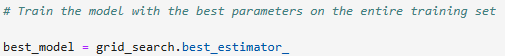

In [134]:
best_model = grid_search.best_estimator_

_________________________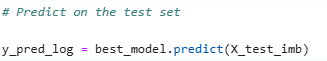

In [136]:
y_pred_log = best_model.predict(X_test_imb)

_________________________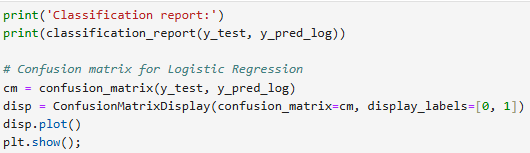

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      5080
           1       0.72      0.43      0.53      1403

    accuracy                           0.84      6483
   macro avg       0.79      0.69      0.72      6483
weighted avg       0.83      0.84      0.82      6483



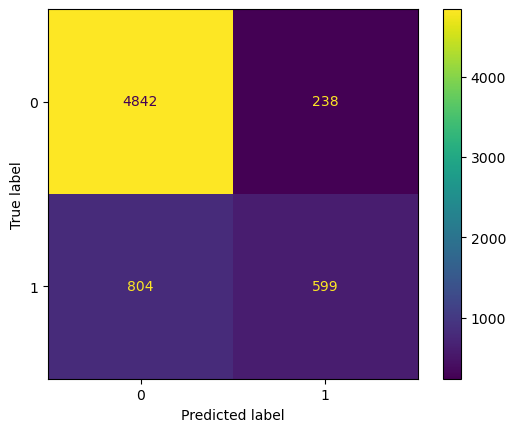

In [138]:
print('Classification report:')
print(classification_report(y_test, y_pred_log))

# Confusion matrix for Logistic Regression
cm = confusion_matrix(y_test, y_pred_log)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show();

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      5080
           1       0.72      0.43      0.53      1403

    accuracy                           0.84      6483
   macro avg       0.79      0.69      0.72      6483
weighted avg       0.83      0.84      0.82      6483



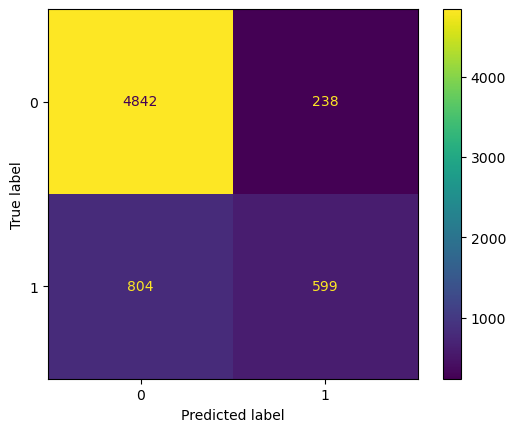

<html> <h3 style="font-style:italic; color:blue;"> Model Performance and Results Visualisation </h3> </html>

#### Now just press 'CTRL' and 'ENTER' keys on the 2next cells.

In [140]:
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score, roc_auc_score

In [142]:
imbalance_ai_models = ['Random Forest', 'Logistic Regression', 'MLP']
prediction_imb = [y_pred_random, y_pred_log, y_pred_ANN]

__________________________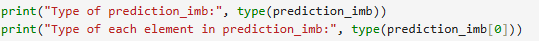

In [144]:
print("Type of prediction_imb:", type(prediction_imb))
print("Type of each element in prediction_imb:", type(prediction_imb[0]))

Type of prediction_imb: <class 'list'>
Type of each element in prediction_imb: <class 'numpy.ndarray'>


Type of prediction_imb: <class 'list'>
Type of each element in prediction_imb: <class 'numpy.ndarray'>


_________________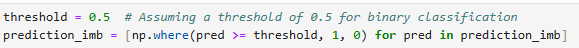

In [146]:
threshold = 0.5
prediction_imb = [np.where(pred >= threshold, 1, 0) for pred in prediction_imb]

#### Now just press 'CTRL' and 'ENTER' keys on the 3 next cells.

In [148]:
accuracy_imb = []
precision_imb = []
recall_imb =[]
f1_imb = []
auc_imb = []
for x in range(0, len(prediction_imb)):
    acc_score = np.round(accuracy_score(y_test, prediction_imb[x]) * 100, 2)
    accuracy_imb.append(acc_score)
    pre_score = np.round(precision_score(y_test, prediction_imb[x], average='weighted') * 100, 2)
    precision_imb.append(pre_score)
    rc_score = np.round(recall_score(y_test, prediction_imb[x], average='weighted') * 100, 2)
    recall_imb.append(rc_score)
    f_score = np.round(f1_score(y_test, prediction_imb[x], average='weighted') * 100, 2)
    f1_imb.append(f_score)
    auc_sc = np.round(roc_auc_score(y_test, prediction_imb[x]) * 100, 2)
    auc_imb.append(auc_sc)

In [150]:
model_perform_imb  = {'Imbalance AI Models':imbalance_ai_models,
              'Accuracy':accuracy_imb,
               'Precision':precision_imb,
               'Recall':recall_imb,
               'F1-Score':f1_imb,
               'AUC':auc_imb
              }
model_data_imb  = pd.DataFrame(model_perform_imb)
print('Result of testing with an Imbalanced Dataset')
model_data_imb

Result of testing with an Imbalanced Dataset


,Imbalance AI Models,Accuracy,Precision,Recall,F1-Score,AUC
0,Random Forest,91.44,91.63,91.44,90.83,81.77
1,Logistic Regression,83.93,82.69,83.93,82.32,69.00
2,MLP,88.96,88.72,88.96,88.14,77.91


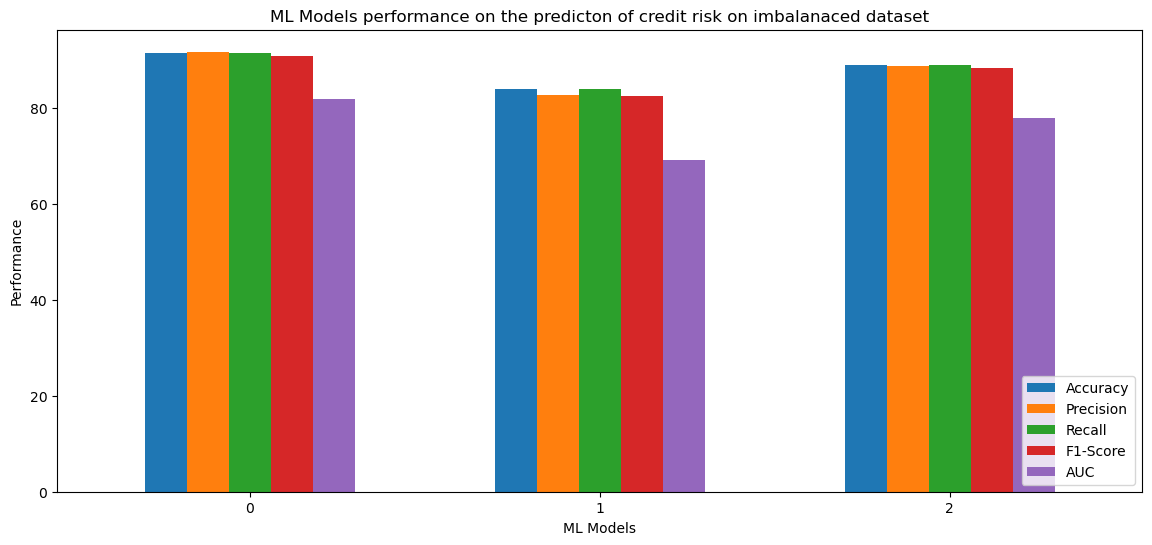

In [152]:
model_imb = model_data_imb.set_index('Imbalance AI Models')

model_data_imb.plot(kind='bar', figsize=(14,6), width=0.6)
plt.title('ML Models performance on the predicton of credit risk on imbalanaced dataset')
plt.ylabel('Performance')
plt.xlabel('ML Models')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()

# Lab Logbook Requirement:

<html> <h3 style="font-style:italic; color:blue;">
   
1) Create and train your own LSTM model
2) Add all the LSTM's Error metrics: Accuracy, Precision, Recall, F1-Score and AUC to the final histogram "ML Models performance...".

</h3> </html>

<html> <h3 style="color:red;">
NOTE: DON'T FORGET TO SAVE AND BACK UP YOUR COMPLETED JUPYTER NOTEBOOK AND LAB LOGBOOK ON GITHUB OR ONEDRIVE.
</h3> </html>

In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.preprocessing.sequence import pad_sequences

In [238]:
bid=pd.read_csv("XAGUSD_5 Mins_Bid_2023.01.01_2023.06.30.csv")
ask=pd.read_csv("XAGUSD_5 Mins_Ask_2023.01.01_2023.06.30.csv")

In [240]:
merge=bid.merge(ask, left_on='Time (UTC)', right_on='Time (UTC)', how='outer')
merge

,Time (UTC),Open_x,High_x,Low_x,Close_x,Volume _x,Open_y,High_y,Low_y,Close_y,Volume _y
0,2023.01.02 23:00:00,24.036,24.059,24.017,24.059,0.3480,24.102,24.125,24.083,24.125,0.3510
1,2023.01.02 23:05:00,24.064,24.130,24.064,24.092,1.8458,24.094,24.188,24.094,24.141,1.1550
2,2023.01.02 23:10:00,24.094,24.098,23.972,23.977,0.9030,24.143,24.148,24.022,24.027,0.8820
3,2023.01.02 23:15:00,23.977,23.980,23.938,23.980,0.8940,24.026,24.028,23.986,24.028,0.8940
4,2023.01.02 23:20:00,23.978,24.024,23.976,24.023,0.8880,24.026,24.073,24.023,24.073,0.9044
...,...,...,...,...,...,...,...,...,...,...,...
35215,2023.06.30 20:35:00,22.752,22.752,22.741,22.746,0.2752,22.782,22.782,22.771,22.776,1.8002
35216,2023.06.30 20:40:00,22.736,22.751,22.736,22.746,0.1410,22.775,22.781,22.775,22.776,0.7568
35217,2023.06.30 20:45:00,22.751,22.751,22.746,22.746,0.0690,22.781,22.781,22.776,22.776,0.4212
35218,2023.06.30 20:50:00,22.746,22.761,22.736,22.756,0.2160,22.776,22.797,22.774,22.786,0.6836


In [242]:
merge.columns = ['time', 'open_bid', 'high_bid', 'low_bid', 'close_bid', 'volume_bid', 'open_ask', 'high_ask', 'low_ask', 'close_ask', 'volume_ask']

In [244]:
file_obj2 = open('merge.csv', 'w')
merge.to_csv('merge.csv', encoding='utf-8', index=False)
file_obj2.close()

In [246]:
new=pd.read_csv('merge.csv', low_memory=False, sep=',')

In [248]:
new["volume_delta"] = new["volume_ask"] - new["volume_bid"]
new["volume_delta_abs"] = (new["volume_ask"] - new["volume_bid"]).abs()

In [250]:
new.describe()
org=new.drop(['open_ask', 'high_ask', 'low_ask', 'close_ask','volume_delta','volume_delta_abs'],axis=1)
org.shape

(35220, 7)

In [252]:
org['time'] = pd.to_datetime(org['time'])
org.head(3)

,time,open_bid,high_bid,low_bid,close_bid,volume_bid,volume_ask
0,2023-01-02 23:00:00,24.036,24.059,24.017,24.059,0.3480,0.351
1,2023-01-02 23:05:00,24.064,24.130,24.064,24.092,1.8458,1.155
2,2023-01-02 23:10:00,24.094,24.098,23.972,23.977,0.9030,0.882


In [254]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
columns_float =['open_bid', 'high_bid', 'low_bid', 'close_bid', 'volume_bid','volume_ask']

In [256]:
scaler = MinMaxScaler()
org[columns_float] = scaler.fit_transform(org[columns_float])
print(org.head())

                 time  open_bid  high_bid   low_bid  close_bid  volume_bid  \
0 2023-01-02 23:00:00  0.665542  0.667579  0.664895   0.669237    0.002884   
1 2023-01-02 23:05:00  0.670040  0.679014  0.672464   0.674538    0.015299   
2 2023-01-02 23:10:00  0.674859  0.673861  0.657649   0.656064    0.007484   
3 2023-01-02 23:15:00  0.656064  0.654856  0.652174   0.656546    0.007410   
4 2023-01-02 23:20:00  0.656225  0.661942  0.658293   0.663454    0.007360   

   volume_ask  
0    0.000960  
1    0.003159  
2    0.002412  
3    0.002445  
4    0.002474  


In [258]:
# Shift the 'high_bid' and 'low_bid' columns to next row
org['high_bid_shifted_next'] = org['high_bid'].shift(-1)  # Shift high_bid to next row
org['low_bid_shifted_next'] = org['low_bid'].shift(-1)    # Shift low_bid to next row
org.head(3)


,time,open_bid,high_bid,low_bid,close_bid,volume_bid,volume_ask,high_bid_shifted_next,low_bid_shifted_next
0,2023-01-02 23:00:00,0.665542,0.667579,0.664895,0.669237,0.002884,0.000960,0.679014,0.672464
1,2023-01-02 23:05:00,0.670040,0.679014,0.672464,0.674538,0.015299,0.003159,0.673861,0.657649
2,2023-01-02 23:10:00,0.674859,0.673861,0.657649,0.656064,0.007484,0.002412,0.654856,0.652174


In [260]:
# Assuming 'org' is your DataFrame
# Example columns: ['time', 'open_bid', 'high_bid', 'low_bid', 'close_bid', 'volume_bid', 'volume_ask', 'high_bid_shifted_next', 'low_bid_shifted_next']

# Step 1: Define your input features (X) and output labels (y)
X = org[['open_bid', 'high_bid', 'low_bid', 'close_bid', 'volume_bid', 'volume_ask']].values
y = org[['high_bid_shifted_next', 'low_bid_shifted_next']].values

# Now X contains the input features, and y contains the output labels


In [262]:
# Define the look-back window
look_back = 3

# Create 3D input tensor (X) and target output (y)
X_3d = [
    org[['open_bid', 'high_bid', 'low_bid', 'volume_bid', 'volume_ask', 
         'high_bid_shifted_next', 'low_bid_shifted_next']].iloc[i:i+look_back].values
    for i in range(len(org) - look_back)
]

y_3d = [org['close_bid'].iloc[i + look_back] for i in range(len(org) - look_back)]

# Convert lists to numpy arrays
X_3d, y_3d = np.array(X_3d), np.array(y_3d)

# Print shapes of input (X_3d) and output (y_3d)
print(X_3d.shape)
print(y_3d.shape)

(35217, 3, 7)
(35217,)


In [266]:

from keras.layers import Input, LSTM, Dense

# Defining the LSTM model
model = Sequential([
    Input(shape=(X_3d.shape[1], X_3d.shape[2])),  # Explicitly define input shape
    LSTM(50),
    Dense(1)  # Predicting 'close_bid'
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [268]:
# set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [270]:
# training the model with validation split and callback
history = model.fit(X_3d, y_3d, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/10
881/881 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0103 - mae: 0.0380 - val_loss: 2.0431e-05 - val_mae: 0.0031
Epoch 2/10
881/881 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2.9764e-05 - mae: 0.0039 - val_loss: 1.9845e-05 - val_mae: 0.0030
Epoch 3/10
881/881 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.8328e-05 - mae: 0.0038 - val_loss: 2.3515e-05 - val_mae: 0.0036
Epoch 4/10
881/881 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.7841e-05 - mae: 0.0038 - val_loss: 1.8621e-05 - val_mae: 0.0031
Epoch 5/10
881/881 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.6620e-05 - mae: 0.0037 - val_loss: 2.2643e-05 - val_mae: 0.0036
Epoch 6/10
881/881 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.6435e-05 - mae: 0.0037 - val_loss: 1.6374e-05 - val_mae: 0.0028
Epoch 7/10
881/881 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.6932e-05 - mae: 0.0037 - val_loss: 2.1825e-05 - val_mae: 0.0036
Epoch 8/10
881/881 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.4016e-05 - mae: 0.0035 - val_loss: 1.9349e-05 - val_mae: 0.0

In [271]:
# Get the final Mean Squared Error (MSE) and Mean Absolute Error (MAE)
final_mse = history.history['loss'][-1]
final_mae = history.history['mae'][-1]

print(f"Final MSE: {final_mse}")
print(f"Final MAE: {final_mae}")

Final MSE: 2.1207457393757068e-05
Final MAE: 0.0033150536473840475


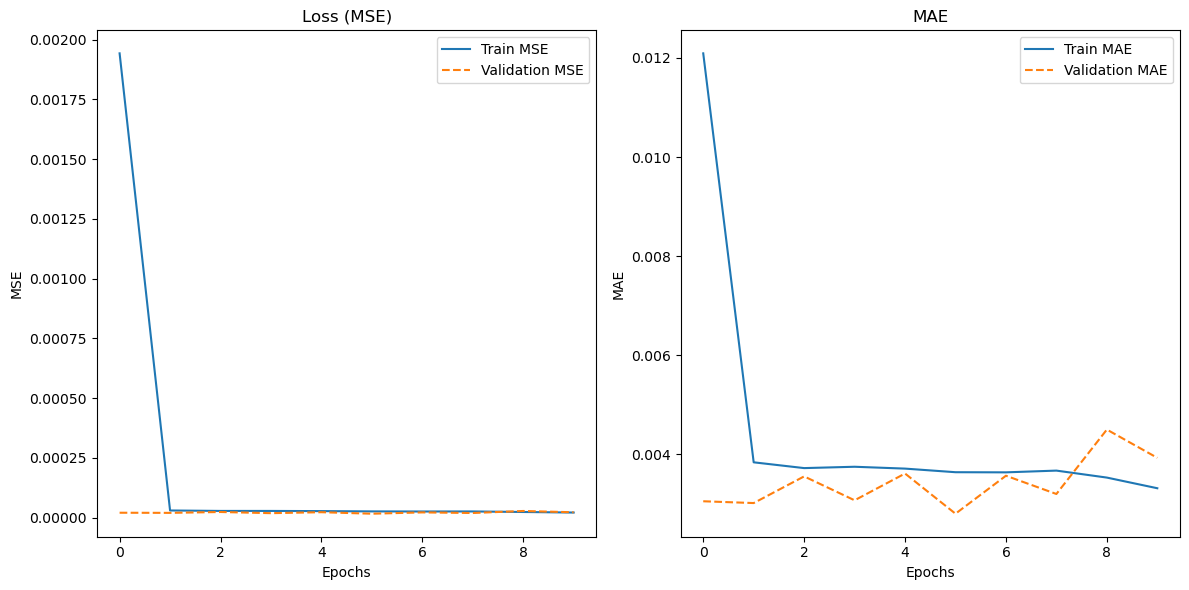

In [272]:
# Plot MSE and MAE

plt.figure(figsize=(12, 6))

# Plot MSE
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train MSE')
plt.plot(history.history['val_loss'], '--', label='Validation MSE')
plt.title('Loss (MSE)')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], '--', label='Validation MAE')
plt.title('MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [292]:
model_perform_imb

{'Imbalance AI Models': ['Random Forest', 'Logistic Regression', 'MLP'],
 'Accuracy': [91.44, 83.93, 88.96],
 'Precision': [91.63, 82.69, 88.72],
 'Recall': [91.44, 83.93, 88.96],
 'F1-Score': [90.83, 82.32, 88.14],
 'AUC': [81.77, 69.0, 77.91]}